In [3]:
from networkx import read_edgelist, set_node_attributes
import pandas as pd
import networkx

In [30]:
attributes = pd.read_csv(
    '/Users/kent/git/kent-ai-learning-notebook/Machine_Learning_Exercise/GCN/karate.attributes.csv',
    index_col=['node'])
attributes.describe()

,role,community
count,34,34
unique,3,2
top,Member,Instructor
freq,32,17


In [16]:
attributes

,role,community
node,,
0,Administrator,Administrator
1,Member,Administrator
2,Member,Administrator
3,Member,Administrator
4,Member,Administrator
5,Member,Administrator
6,Member,Administrator
7,Member,Administrator
8,Member,Administrator


In [6]:
network = read_edgelist(
    '/Users/kent/git/kent-ai-learning-notebook/Machine_Learning_Exercise/GCN/karate.edgelist',
    nodetype=int)

In [7]:
set_node_attributes(
            network,
            values=pd.Series(
                attributes['role'],
                index=attributes.index).to_dict(),
            name='role'
        )
set_node_attributes(
            network,
            values=pd.Series(
                attributes['community'],
                index=attributes.index).to_dict(),
            name='community'
        )

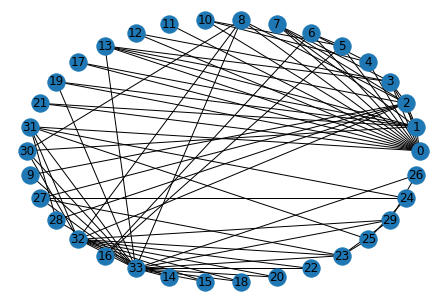

In [8]:
networkx.draw_circular(network, with_labels=True)


In [27]:
X_train, y_train = list(zip(*[([node], data['role'] == 'Administrator') 
 for node, data in network.nodes(data=True) if data['role'] in {'Administrator', 'Instructor'}]))



In [28]:
X_train

([0], [33])

In [29]:
y_train

(True, False)

## 參考資料：https://studentwork.prattsi.org/infovis/labs/zacharys-karate-club/

nodes 1 and 34 are the most connected of the network. However, because of how dense the relationships are for Mr. Hi and John A, the upper half of the visualization becomes difficult to read. It is also difficult to tell the two new clubs apart from each other given that every line and node is represented in the same manner.
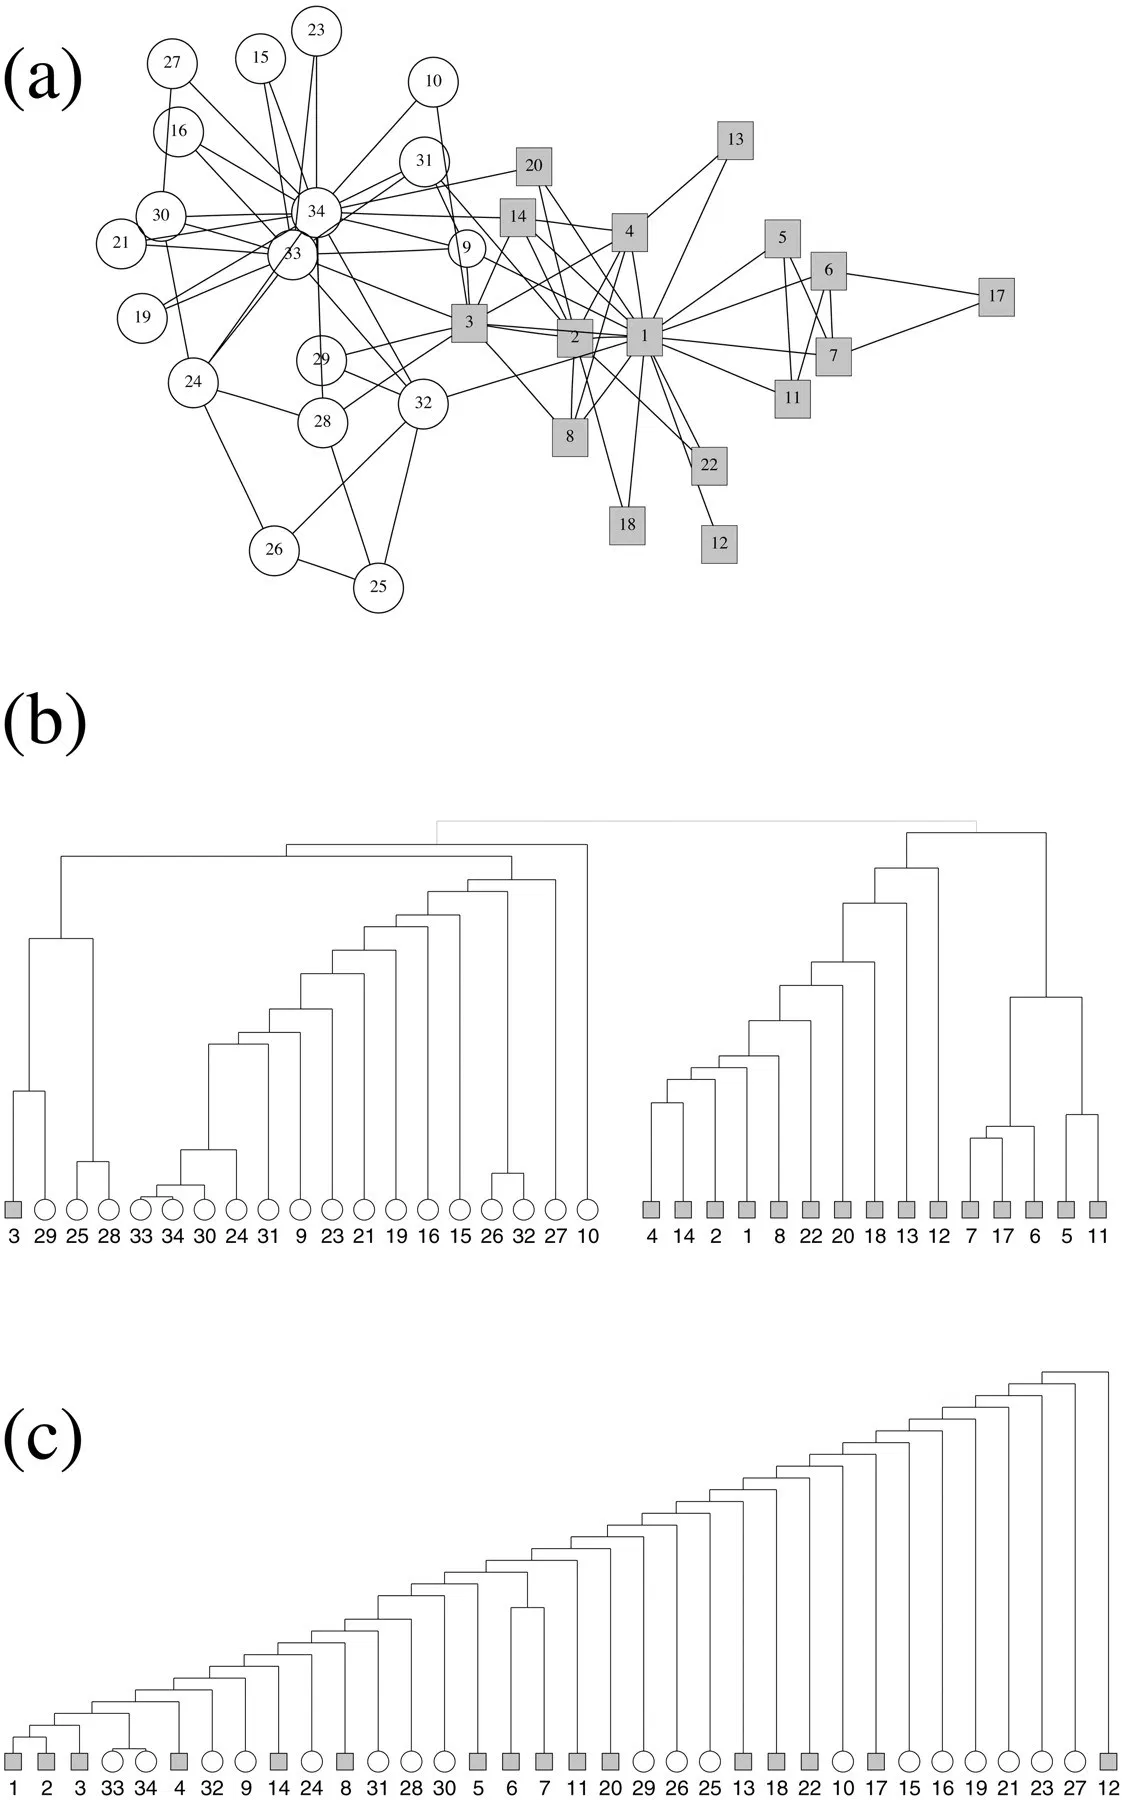